# Cryptography challenges

### https://cryptohack.org/

## General

### Encoding

#### Ascii

In [1]:
from typing import *
import base64

In [2]:
data = [99, 114, 121, 112, 116, 111, 123, 65, 83, 67, 73, 73, 95, 112, 114, 49, 110, 116, 52, 98, 108, 51, 125]

def solve(char_array: List[str]) -> str:
    return "".join(chr(i) for i in char_array)

solve(data)

'crypto{ASCII_pr1nt4bl3}'

#### Hex

In [3]:
data = "63727970746f7b596f755f77696c6c5f62655f776f726b696e675f776974685f6865785f737472696e67735f615f6c6f747d"

def _split(data: str, space: int) -> List[str]:
    return [data[i:i+space] for i in range(0, len(data) - 1, space)]

def resolve(data: List[str]) -> str:
    return "".join(list(map(lambda x: chr(int(x, 16)), data)))

resolve(_split(data, 2))

'crypto{You_will_be_working_with_hex_strings_a_lot}'

#### Base64

In [4]:
data = "72bca9b68fc16ac7beeb8f849dca1d8a783e8acf9679bf9269f7bf"

base64.b64encode(bytes.fromhex(data)).decode()

'crypto/Base+64+Encoding+is+Web+Safe/'

#### Bytes and Big Integers

In [5]:
data = "11515195063862318899931685488813747395775516287289682636499965282714637259206269"

def solve(data: str) -> str:
    return "".join(chr(int(x, 16)) for x in _split(str(hex(int(data)))[2:], 2))

solve(data)

'crypto{3nc0d1n6_4ll_7h3_w4y_d0wn}'

#### Encoding Challenge

Useless

### XOR

#### XOR Starter

In [6]:
data = "label"

def solve(data: str) -> str:
    return "".join(chr(ord(x)^13) for x in data)

solve(data)

'aloha'

#### XOR Properties

    KEY1 = a6c8b6733c9b22de7bc0253266a3867df55acde8635e19c73313
    KEY2 ^ KEY1 = 37dcb292030faa90d07eec17e3b1c6d8daf94c35d4c9191a5e1e
    KEY2 ^ KEY3 = c1545756687e7573db23aa1c3452a098b71a7fbf0fddddde5fc1
    FLAG ^ KEY1 ^ KEY3 ^ KEY2 = 04ee9855208a2cd59091d04767ae47963170d1660df7f56f5faf

In [7]:
from pwn import xor
from binascii import unhexlify  

KEY1 = bytes.fromhex("a6c8b6733c9b22de7bc0253266a3867df55acde8635e19c73313")
KEY2_KEY1 = bytes.fromhex("37dcb292030faa90d07eec17e3b1c6d8daf94c35d4c9191a5e1e")
KEY2_KEY3 = bytes.fromhex("c1545756687e7573db23aa1c3452a098b71a7fbf0fddddde5fc1")
FLAG_KEY1_KEY2_KEY3 = bytes.fromhex("04ee9855208a2cd59091d04767ae47963170d1660df7f56f5faf")

KEY2 = xor(KEY1, KEY2_KEY1)
KEY3 = xor(KEY2, KEY2_KEY3)
FLAG = xor(KEY1 , KEY2, KEY3, FLAG_KEY1_KEY2_KEY3)
FLAG.decode()

'crypto{x0r_i5_ass0c1at1v3}'

#### Favorite byte

In [8]:
data = "73626960647f6b206821204f21254f7d694f7624662065622127234f726927756d"
def solve() -> str:
    ret: str
    for i in range(0xff):
        ret = xor(bytes.fromhex(data), i).decode()
        if "crypto" in ret: return ret
    return ""

solve()

'crypto{0x10_15_my_f4v0ur173_by7e}'

#### You either know, XOR you don't

In [9]:
data = "0e0b213f26041e480b26217f27342e175d0e070a3c5b103e2526217f27342e175d0e077e263451150104"

def solve(key: str) -> str:
    return xor(bytes.fromhex(data), key).decode()

print(solve("crypto{FLAG}"))
solve("myXORkey")

myXORkeGgfDFWg)a|LpWCFTXS[UQO@EF(euk


'crypto{1f_y0u_Kn0w_En0uGH_y0u_Kn0w_1t_4ll}'

#### Lemur XOR

    convert resources/lemur.png resources/flag.png -evaluate-sequence xor result.png
    
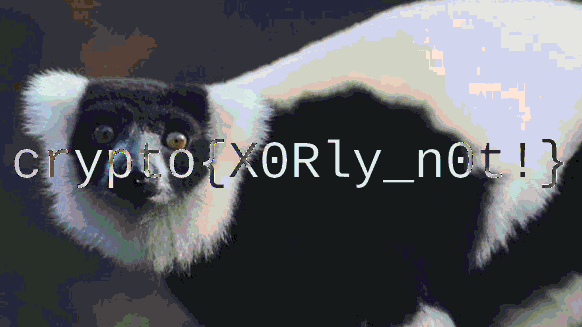

### Mathematics

#### Greatest Common Divisor

In [10]:
# Euclid algorithm
def _gcd(a: int, b: int) -> int:
    while a != b:
        if a > b:
            a = a - b
        else:
            b = b - a
    return a

_gcd(66528, 52920)

1512

#### Extended GCD

    a * u + b * v = gcd(a,b)


In [11]:
# Extended Euclid algorithm
def extended_gcd(a: int, b: int) -> (int, int):
    if b == 0:
        return (1, 0)
    else:
        (u, v) = extended_gcd(b, a % b)
        return (v, u - (a // b) * v)

extended_gcd(26513, 32321)

(10245, -8404)

#### Modular Arithmetic 1

In [12]:
def is_int_congruence(a: int, b: int, c: int) -> bool:
    return a % c == b % c

def bruteforce_congruence(a: int, c: int) -> int:
    b: int = 1
    while not is_int_congruence(a, b, c):
        b +=1
    return b

min(bruteforce_congruence(11, 6), bruteforce_congruence(8146798528947, 17))

4

#### Modular Arithmetic 2

In [13]:
27324678765465536**65536 % 65537

1

#### Modular Inverting

In [14]:
# 3 * d ≡ 1 mod 13
# (3 * d) % 13 == 1 % 13
# 27 % 13 = 1
# d = 9

def solve() -> int:
    d: int = 0
    while not is_int_congruence(3 * d, 1, 13):
        d += 1
    return d

solve()

9

### Data formats

 #### Privacy-Enhanced Mail?

In [16]:
def func():
    pass

## Mathematics

### Modular math

#### Quadratic Residues

In [15]:
ints: List[int] = [14, 6, 11]

def is_quadratic_residue(a: int, x: int, p: int) -> bool:
    return (a**2) % p == x

def square_root(x: int, p: int) -> int:
    for i in range(1, p):
        if is_quadratic_residue(i, x, p):
            return i
    return 0

def solve(ints: List[int]) -> int:
    return list(filter(lambda x: x, [square_root(x, 29) for x in ints]))[0]

solve(ints)

8

#### Legendre Symbol

    Working